<a href="https://colab.research.google.com/github/puneat/UCI-Ionosphere-Classifier/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
import numpy as np 
import pandas as pd
import csv
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#reading the input file
df= pd.read_csv('/gdrive/My Drive/ionosphere_classifier/data/ionosphere_csv.csv')
df.tail(5)

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,0.78735,0.06678,0.80668,-0.00351,0.79262,-0.01054,0.85764,-0.04569,0.87170,-0.03515,0.81722,-0.09490,0.71002,0.04394,0.86467,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g


In [6]:
#converting class into boolean as b=0 and g=1
for i in range(0,df.shape[0]):
  if df['class'][i]=='b':
    df['class'][i]=0;
  if df['class'][i]=='g':
    df['class'][i]=1;
#typecasting as integer
df['class']=df['class'].astype(int)
df.drop(['a02'], axis = 1, inplace = True) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 33].values
print('Dimensions of input features, X is: '+ str(X.shape))
print('Dimensions of output labels, y is: '+ str(y.shape))

Dimensions of input features, X is: (351, 33)
Dimensions of output labels, y is: (351,)


In [8]:
#Using sci-kit's train_test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print('Rows in training data : '+ str(X_train.shape[0]))
print('Rows in testing data : '+ str(X_test.shape[0]))

Rows in training data : 245
Rows in testing data : 106


In [0]:
def knn_model_complete(k_value,acc_report,pre_report,rec_report):
  knn_model = KNeighborsClassifier(
                n_neighbors=k_value, #No. of neighbours
                p=1, # minkowski distance with p=1
                n_jobs=-1, #parallelization of the process
                metric='manhattan', #using manhattan distance instead of euclidean*
                leaf_size=50, #Setting maximum leaf size for optimization function
                algorithm='kd_tree' #doing multidimensional search using k-d tree
                                ) 
# fitting the training data to the model
  knn_model.fit(X_train, y_train)
  #Predicitng on the test set
  y_pred = knn_model.predict(X_test)
  #creating a classification report
  temp=classification_report(y_test, y_pred,output_dict=True)
  #saving the preformance metrics
  acc_report.append(100*temp['accuracy'])
  pre_report.append(100*temp['macro avg']['precision'])
  rec_report.append(100*temp['macro avg']['recall'])
  return acc_report,pre_report,rec_report

In [0]:
acc_report=[]; pre_report=[]; rec_report=[]
for i in range(1,30):
  knn_model_complete(i,acc_report,pre_report,rec_report);

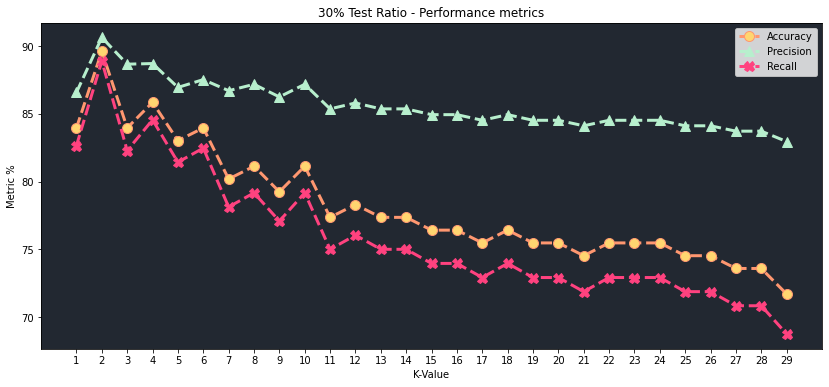

In [14]:
#plotting the accuracy for every k-value
fig = plt.figure(facecolor='w',figsize=(14,6)) # creating a plot figure
ax = fig.add_subplot(111, axisbelow=True,facecolor='#222831')
cols = np.linspace(1, 29, 29)
ax.plot(cols, acc_report, color='#ff9770', linestyle='dashed', marker='o',
         markerfacecolor='#ffd670', markersize=10,lw=3) #Accuracy
ax.plot(cols, pre_report, color='#b7efcd', linestyle='dashed', marker='^',
         markerfacecolor='#b7efcd', markersize=10,lw=3) #Precison
ax.plot(cols, rec_report, color='#ff427f', linestyle='dashed', marker='X',
         markerfacecolor='#ff427f', markersize=10,lw=3) #Recall
plt.title('30% Test Ratio - Performance metrics')
plt.xlabel('K-Value'); plt.ylabel('Metric %');
plt.xticks(cols)
plt.legend(['Accuracy','Precision','Recall'])
plt.show()